Using device: cpu
Number of classes: 5749
Total images: 13233


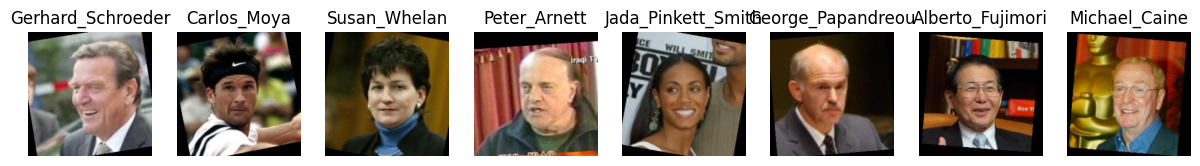

In [5]:
# 1.1 Imports
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1.2 Set seed and device
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1.3 Dataset path
lfw_path = "../Datasets/lfw-dataset"

# 1.4 Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # For ResNet input
    transforms.ToTensor(),
])

# 1.5 Load dataset
lfw_dataset = datasets.ImageFolder(root=lfw_path, transform=transform)
lfw_loader = DataLoader(lfw_dataset, batch_size=8, shuffle=True)

# 1.6 Dataset stats
print(f"Number of classes: {len(lfw_dataset.classes)}")
print(f"Total images: {len(lfw_dataset)}")

# 1.7 Visualise a batch
def show_images(images, labels, class_names):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].permute(1, 2, 0))
        ax.set_title(class_names[labels[i]])
        ax.axis("off")
    plt.show()

# 1.8 Run visualisation
images, labels = next(iter(lfw_loader))
show_images(images, labels, lfw_dataset.classes)
